By: **Andrey Núñez** & **Eric Walzthöny**



# Imports

In [ ]:
#importing the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk, string

# Data fetching

In [ ]:
#downloading the gutenberg NLP corpus 
nltk.download('gutenberg')

#getting the blake-poems words
cp = nltk.corpus.gutenberg.words('blake-poems.txt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
#downloading the stopwords 
nltk.download('stopwords')

#assigning the stopwords 
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Token removal

In [ ]:
#getting the punctuation 
punct = string.punctuation

#extending the punctuation by a specific item 
punct = punct + '."'
punct = punct + ';"'
punct = punct + ',"'
punct = punct + "--"

In [ ]:
# lowercase corpus 
cp_low = list(map(lambda x: x.lower(), cp))

In [ ]:
# removing punctuation and stop words 
filtered_words_punct = [x for x in cp_low if x not in sw and x not in punct]

In [ ]:

#generating a counter with dict
freqs = {x:filtered_words_punct.count(x) for x in filtered_words_punct}

# Data display

In [ ]:
  # creating the dataframe
df = pd.DataFrame({"Words":freqs.keys(),
                     "Count":freqs.values()}
                    )
  # seeing the top 25 values 
df = df.sort_values('Count',ascending=False).reset_index()

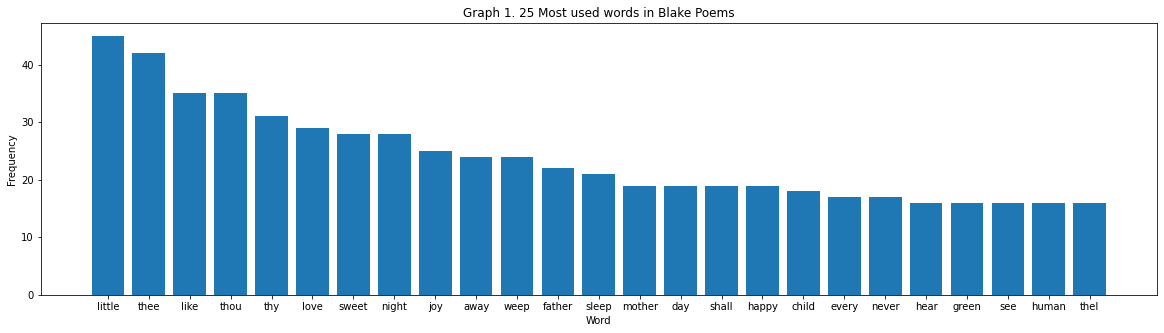

In [ ]:
FIG_SIZE = (20,5)
plt.figure(figsize=FIG_SIZE)

#graphing the dataframe
plt.bar(df['Words'][:25], df['Count'][:25])
plt.title('Graph 1. 25 Most used words in Blake Poems')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#adding a length column
df['len'] = df['Words'].apply(lambda x: len(x))

In [ ]:
# looking at the words with less than 2 characters 
mask = df['Words'].apply(lambda x: len(x)<=2)
df_masked = df.loc[mask]

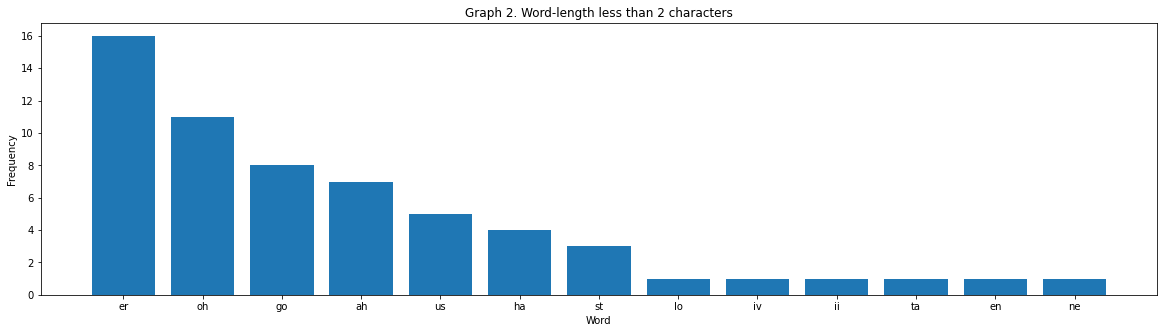

In [ ]:
#graphing the words 
FIG_SIZE = (20,5)
plt.figure(figsize=FIG_SIZE)

#graphing the dataframe
plt.bar(df_masked['Words'], df_masked['Count'])
plt.title('Graph 2. Word-length less than 2 characters')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# now we want to look at the words without the len(x) <= 2
df_larger_2 = df.loc[~mask]

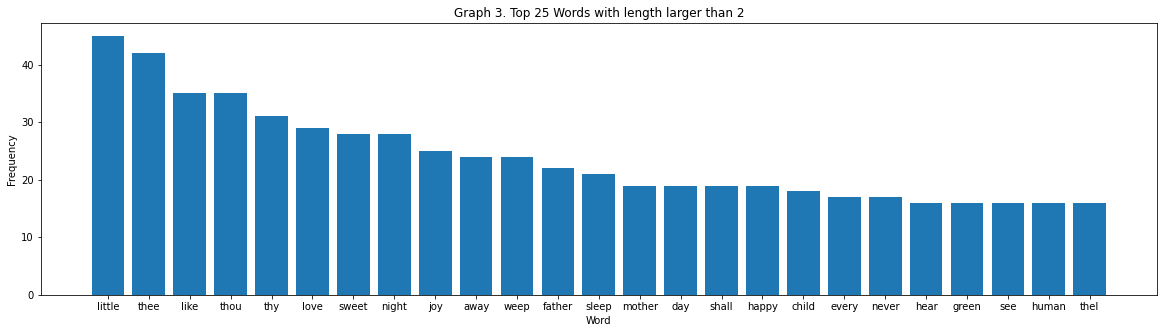

In [ ]:
#graphing the words 
FIG_SIZE = (20,5)
plt.figure(figsize=FIG_SIZE)

#graphing the dataframe
plt.bar(df_larger_2['Words'][:25], df_larger_2['Count'][:25])
plt.title('Graph 3. Top 25 Words with length larger than 2')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

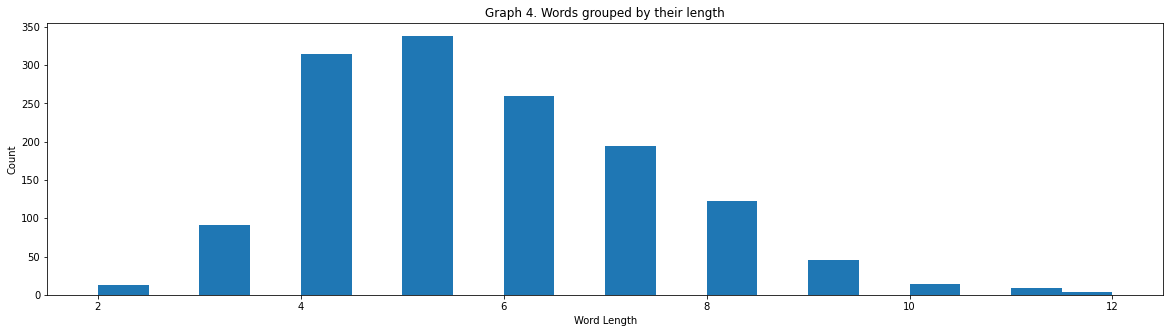

In [ ]:
#graphing the words 
FIG_SIZE = (20,5)
plt.figure(figsize=FIG_SIZE)

# plot 
plt.hist(df['len'], 20)
plt.title('Graph 4. Words grouped by their length')
plt.xlabel("Word Length")
plt.ylabel("Count")
plt.show()

In [ ]:
df.len.describe()

count    1406.000000
mean        5.578236
std         1.699674
min         2.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        12.000000
Name: len, dtype: float64

1. **Design Decisions**

The design decisions that were followed were the following: 

From the corpus of "Blake Poems" we removed the stopwords as well as the punctuation marks. We removed these, because they don't provide any additional information to the sentence, the same as punctuation signs. 

This left us with the word-list that the author uses. We stored these in a dictionary in order to count the occurence of each distinct word, since dictionary only allow one key-value pair, it is a good choice. 

This dictionary was then converted into a pandas DataFrame, for easier manipulation and in turn, visualization. 

The graph is only a visual aid to compare the usage of different words. It's much clearer to see what type of words are used the most. Our variable "punct" had to be extended to include a variation of a punctuation mark (' ." '). 

Additionally, we chose to apply the str.lower() method to the entire corpus because we noticed that when applying it within the list comprehension, there would still be stop-words in the final dictionary. So we tested both ways and found that applying the lower case method to the corpus was much simpler. We are not sure whether this would affect the analysis and validation of the data later in the downstream processes. 

For this, we looked at the words which have a length of less than or equal to 2, in order to see what was happening. We found out that in the top 25 there aren't any words with less than 2 characters, however there were words which are not standalone words, and do not provide additional information, for this we'd need more context. 

The order of events would be: 
Corpus --> Filtered Stop-words --> Filtered punctuation --> counter --> visualization. 



2. **Conclusions**

To summarize, we used a natural language library named NLTK in order to extract a corpus from the Gutenberg project. Then removed the stopwords and punctuation marks using the same module or a built-in one such as "String". 

We attempted to different ways to "clean" the corpus by removing the stop-words and the punctuation marks, however, the easiest way we found was to apply the str.lower() method directly to the entire corpus. In order to figure out what exactly was happening with the corpus we graphed it in three variations: 

1. Top 25 words 
2. Word-length less than or equal to 2 
3. Top 25 words without the words shorter or equal to 2 in length. 


We attempted to make a whole block execution but it happened that the stopwords would not be removed correctly. We thought that it might have been that the weren't using the lowercase correctly. This wasn't the case.

 In the end, we decided to do apply the str.lower() function to the entire corpus (using map() and lambda() ) in order to standardize the data previous to any analisys or filtering. Doing so, allows us to control the shape of our input data and therefore simplyfing the identification and removal of tokens like stopwords and punctuation marks, as well as increasing the confidense on the filtering process.

Additionally, we explored a bit further to see whether there was a difference with the words that were longer than 2 characters and found no variations in the top 25 words being used. Furthermore, we also investigated the length of the words in the remaining corpus, out of curiosity, and found that the average word-length used by the author William Blake is about 5 characters. Overall, the exercise provided methods to be able to count the frequency of words and removing the punctuation and stop-words for a specific language (english). 
